# Bilddaten

Digitale Bilder bestehen aus drei Farbwerten (rot, grün, blau) pro Pixel, d.h. Bildelement. Aus diesen drei Werten wird bei der Darstellung die gewünschte Farbe zusammengestellt. Der Wertebereich ist dabei entweder zwischen 0 und 255 (8-bit) oder als Gleitkommazahl zwischen 0 und 1.   

In [12]:
import numpy as np
np.set_printoptions(precision=2, linewidth=65)

import matplotlib.pyplot as plt
plt.rc('figure', dpi=150)

Im weiteren wird ein Bild der Bergmann Brauerei {download}`bergmann.jpeg` zur Demonstration verwendet. Die Bilddaten können mit der `plt.imread`-Funktion als dreidimensionales Array von 8-bit vorzeichenlosen ganzen Zahlen eingelesen werden.

In [13]:
data = plt.imread('./bergmann.jpeg')
print( "Form:", data.shape )
print( "Datentyp der Elemente:", data.dtype)

Form: (2027, 3040, 3)
Datentyp der Elemente: uint8


In [14]:
# Auszug aus den dreidimensionalem Datensatz
print( data )

[[[ 28  49  44]
  [ 30  49  45]
  [ 31  47  44]
  ...
  [118 137  92]
  [105 127  88]
  [108 130  92]]

 [[ 30  47  41]
  [ 30  45  40]
  [ 31  46  39]
  ...
  [109 133  83]
  [111 135  87]
  [115 139  91]]

 [[ 28  43  40]
  [ 27  42  39]
  [ 31  44  37]
  ...
  [108 131  79]
  [109 137  79]
  [109 137  79]]

 ...

 [[122 119  76]
  [127 124  81]
  [132 129  84]
  ...
  [209 207 195]
  [210 211 195]
  [209 210 194]]

 [[124 121  80]
  [127 124  83]
  [130 127  82]
  ...
  [192 191 186]
  [195 194 189]
  [198 197 192]]

 [[126 123  82]
  [127 124  83]
  [129 126  83]
  ...
  [184 184 186]
  [184 184 186]
  [188 188 190]]]


Mit der bereits vorgestellten Funktion `plt.imshow` kann das Bild in Echtfarben dargestellt werden. Dies funktioniert, da die Funktion die einzelnen Ebenen, hier der letzte Index, des Datensatzes als Farbinformationen (rot, grün, blau) interpretiert. Wäre noch eine vierte Ebene dabei, würde sie als individueller Transparenzwert verwendet worden.

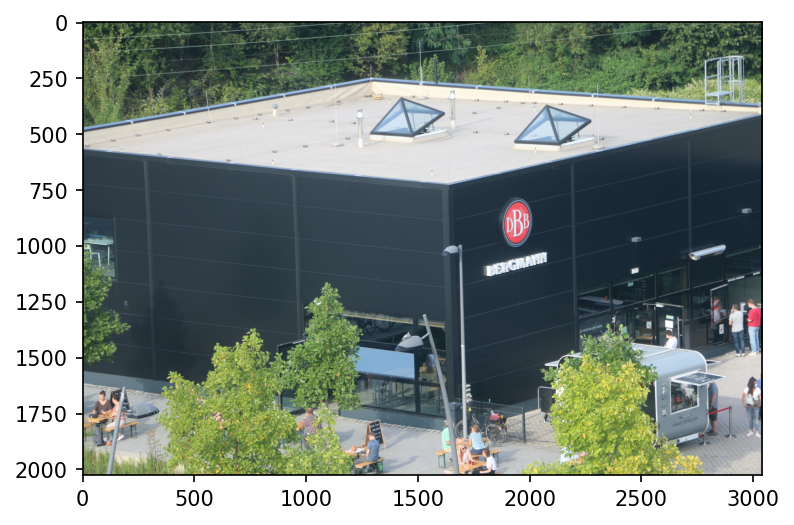

In [15]:
plt.imshow( data );

Natürlich können auch die einzelnen Farbebenen individuell betrachtet werden. Dazu wird der letzte Index festgehalten.

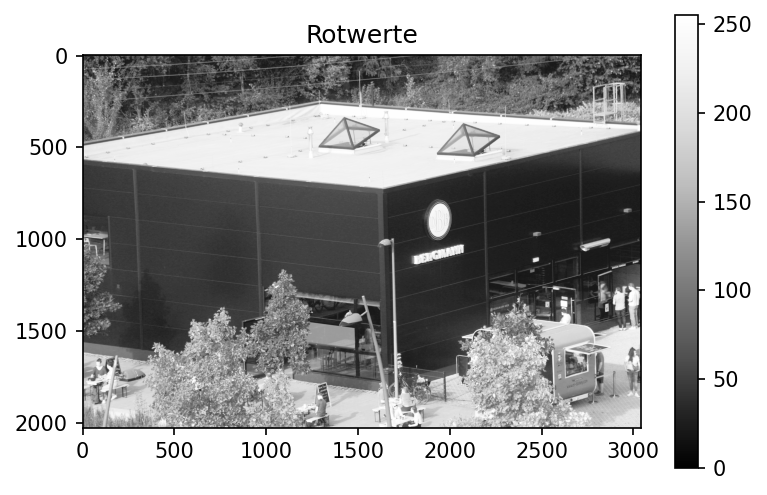

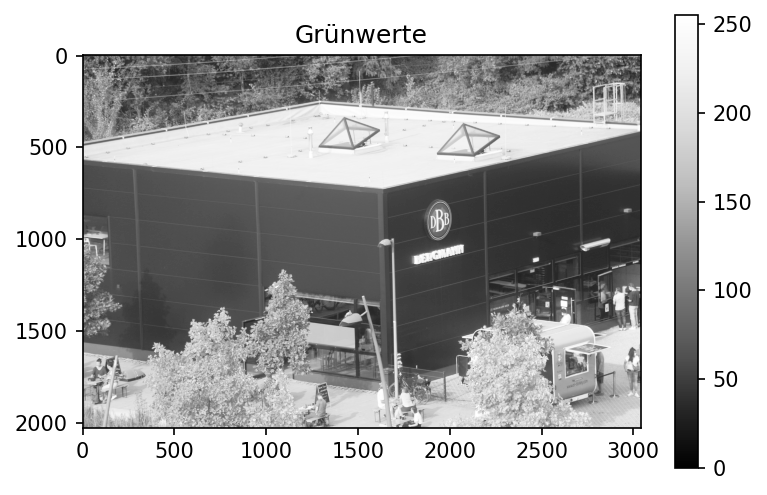

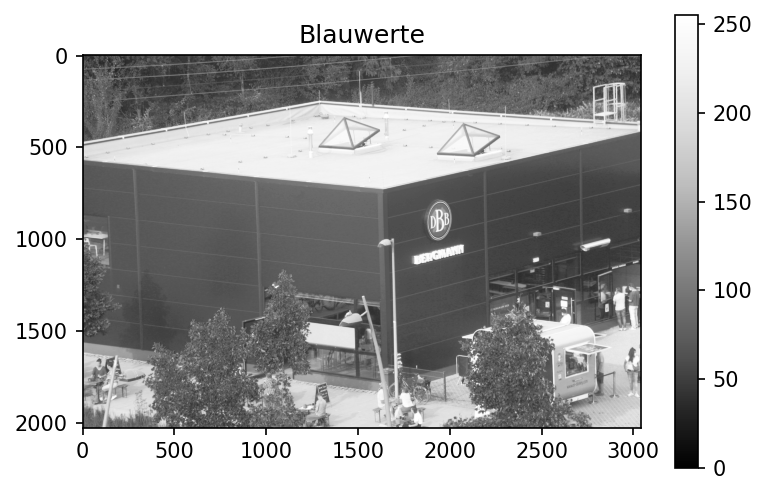

In [16]:
titel = ["Rotwerte", "Grünwerte", "Blauwerte"]

for i in range(3):
    # Als Farbskale wird die invertierte '_r' Grauskala 
    # verwendet 'Greys'
    plt.imshow( data[:,:,i], cmap='Greys_r' )
    plt.title(titel[i])
    plt.colorbar()
    plt.show()


Da die Bilddaten als Arrays gespeichert sind, sind viele der möglichen Optionen, z.B. zur Teilauswahl oder Operationen, verfügbar. Das untere Beispiel zeigt einen Ausschnitt im Rotkanal des Bildes. 

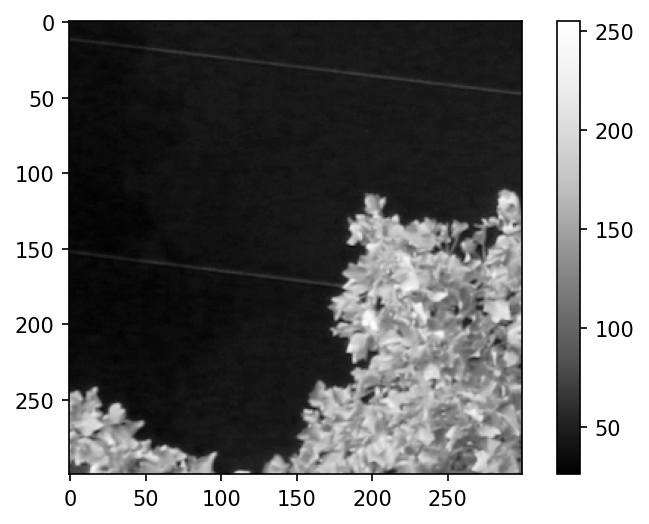

In [17]:
bereich = np.array(data[1320:1620, 400:700, 0], dtype=float)
plt.imshow( bereich, cmap="Greys_r" )
plt.colorbar();

Als Beispiel für eine Bildoperation wird der Laplace-Operator vorgestellt. Er kann genutzt werden um Ränder von Objekten zu identifizieren. Dazu wird für jeden Bildpunkt $\sf B_{i,j}$ – außer an den Rändern – folgender Wert $\sf \phi_{i, j}$ berechnet:

$$ \sf \phi_{i, j} = \left|B_{i-1, j} + B_{i, j-1} - 4\cdot B_{i, j} + B_{i+1, j} + B_{i, j+1}\right| $$

Folgende Funktion implementiert diese Operation. Darüber hinaus werden alle Werte von $\sf \phi$ unterhalb eines Schwellwerts auf Null und oberhalb auf 255 gesetzt.

In [18]:
def img_lap(data, schwellwert=25):
    
    # Erstellung einer Kopie der Daten, nun jedoch als
    # Array mit Gleitkommazahlen
    bereich = np.array(data, dtype=float)
    
    # Aufteilung der obigen Gleichung in zwei Teile
    lapx = bereich[2:, :] - 2*bereich[1:-1, :] + bereich[:-2, :]
    lapy = bereich[:, 2:] - 2*bereich[:, 1:-1] + bereich[:, :-2]
    
    # Zusammenführung der Teile und Bildung des Betrags
    lap = np.abs(lapx[:,1:-1] + lapy[1:-1, :])
    
    # Schwellwertanalyse
    lap[lap > schwellwert] = 255
    lap[lap < schwellwert] = 0
    
    return lap

Die Anwendung des Laplace-Operators auf den oberen Bildausschnitt ergibt folgende Ausgabe. Hier sind deutlich die Umrisse der Bildstrukturen erkennbar.

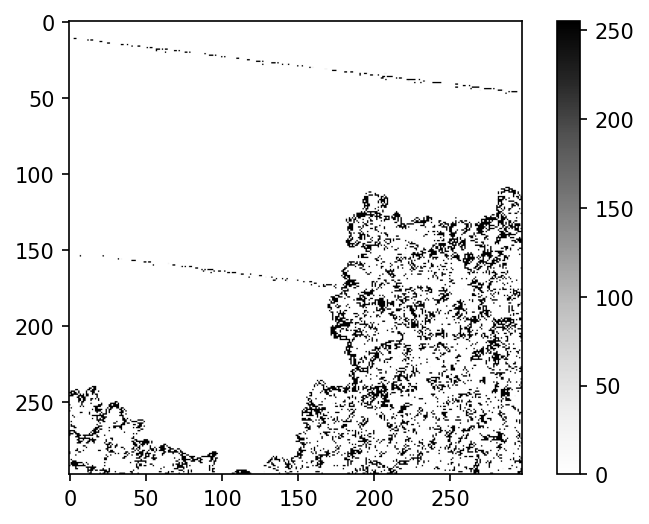

In [19]:
lap = img_lap(bereich)
plt.imshow(lap, cmap="Greys")
plt.colorbar();

Zum Vergleich noch beide Abbildungen nebeneinander. Im folgenden wird die Funktion `plt.subplot` verwendet, welche mehrere Graphiken in einer Abbildung ermöglicht. Beispiele und Dokumentation sind beispielsweise [hier](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.subplot.html) zu finden.

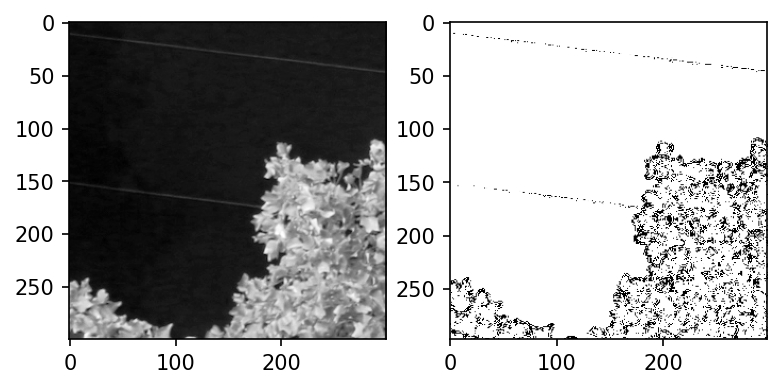

In [20]:
ax = plt.subplot(1, 2, 1)
ax.imshow(bereich, cmap="Greys_r")

ax = plt.subplot(1, 2, 2)
ax.imshow(lap, cmap="Greys");